<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello George!

I'm happy to review your project today  🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments. If you have any questions, don't hesitate to respond to my comments in a different section.
<div class="alert alert-info"> <b>Student comments: </div>    

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Overall, well done! I can see that a lot of effort has been put in. Your project already looks really good, and you've achieved impressive results.

However, there are some comments/areas left to fix that will help you to make your project even better (in red boxes with the title - `Reviewer's comment v1`). 
    
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for clarification.
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 

Thank you for making changes to your project! Could you please take a look at additional comments: title - `Reviewer's comment v2:`?
    
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.

I will wait for you to send me a new version of the project :)
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v3:</b>
    
<b>Overall Feedback</b> 
    
Thank you for going an extra mile and enhancing your project. There are no issues left, so your project has been accepted. I wish you engaging projects in the upcoming sprints! ☘️
    
PS: As a final note, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo  
    
Another great self-paced course that covers basic concepts in probability and statistics - Probability and Statistics by Stanford Online or you could check this one [An Introduction to Statistical Learning with Applications in R](https://www.r-bloggers.com/2014/09/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/) 🙌

</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

The objective of this analysis is to determine which prepaid plan generates more revenue for Megaline. To achieve this, I will use statistical methods to analyze client behavior and usage patterns associated with each plan. By identifying correlations between plan choice and revenue generation, I aim to provide actionable insights that will assist in optimizing revenue.

This analysis will not only highlight the financial performance of each plan but also offer strategic recommendations. Ultimately, the findings will guide Megaline in making informed decisions to capitalize on its most profitable prepaid plan.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great job keeping the additional information about the project goal! Additionally, you could add a short description of the tasks you plan to perform and the available data. This information could be helpful for the notebook reader.



In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


## Load data

In [2]:
# Load the data files into different DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')


In [3]:
df_internet = pd.read_csv('/datasets/megaline_internet.csv')

In [4]:
df_messages = pd.read_csv('/datasets/megaline_messages.csv')

In [5]:
df_plans = pd.read_csv('/datasets/megaline_plans.csv')

In [6]:
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

## Plans

In [7]:
# Print the general/summary information about the plans DataFrame
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [8]:
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [9]:
# Print a sample of data for plans
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [10]:
print('The data types seem appropriate for the columns based on the information provided. The d-type for numerical counts are all in int64, the two columns that show cents are in float64 type and the plan name is an object.There also isnt any missing values shown since all non-null counts are at 2.') 

The data types seem appropriate for the columns based on the information provided. The d-type for numerical counts are all in int64, the two columns that show cents are in float64 type and the plan name is an object.There also isnt any missing values shown since all non-null counts are at 2.


## Fix data

## Enrich data

## Users

In [11]:
# Print the general/summary information about the users' DataFrame

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [13]:
# Print a sample of data for users
df_users.sample()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
465,1465,Arianna,Morrison,73,"Pittsburgh, PA MSA",2018-06-22,ultimate,NaN


In [14]:
print('The churn_date column has 34 non-null values out of 500 entries, indicating 34 users have canceled their subscription. This leaves us with missing values seen in the sample. Since the missing values mean that the plan is still active we can replace missing values with the word active using the fillna() method. We can also see reg_date is currently stored as an object type. It would be beneficial to convert this column to datetime.This can be achieved using pd.to_datetime() function.   ')

The churn_date column has 34 non-null values out of 500 entries, indicating 34 users have canceled their subscription. This leaves us with missing values seen in the sample. Since the missing values mean that the plan is still active we can replace missing values with the word active using the fillna() method. We can also see reg_date is currently stored as an object type. It would be beneficial to convert this column to datetime.This can be achieved using pd.to_datetime() function.   


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix Data

In [15]:
df_users['churn_date'].fillna('active', inplace=True)
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,active


### Enrich Data

In [16]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


## Calls

In [17]:
# Print the general/summary information about the calls' DataFrame
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [18]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [19]:
# Print a sample of data for calls

df_calls.sample()

,id,user_id,call_date,duration
29460,1111_96,1111,2018-09-26,6.65


In [20]:
print('In info() we can see that the id column and the call-date column are in object type when the id column should be in integer type and the call-date columns should be in datetime type. First we change the id column over to integer by using the astype() method. Then we change the call-date column using pd.to_datetime() method. We can also see in the sample that the id column has an _ in each integer. To process data better we can remove it using the replace() method. There are also no missing values seen by checking the non-null values in info(), all columns are 137735.') 

In info() we can see that the id column and the call-date column are in object type when the id column should be in integer type and the call-date columns should be in datetime type. First we change the id column over to integer by using the astype() method. Then we change the call-date column using pd.to_datetime() method. We can also see in the sample that the id column has an _ in each integer. To process data better we can remove it using the replace() method. There are also no missing values seen by checking the non-null values in info(), all columns are 137735.


### Fix data

In [21]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['id'] = df_calls['id'].astype('int64')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  int64         
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.2 MB


In [22]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month

### Enrich data

In [23]:
df_calls['id'] = df_calls['id'].replace('_', '')
df_calls.head()


,id,user_id,call_date,duration,month
0,100093,1000,2018-12-27,8.52,12
1,1000145,1000,2018-12-27,13.66,12
2,1000247,1000,2018-12-27,14.48,12
3,1000309,1000,2018-12-28,5.76,12
4,1000380,1000,2018-12-30,4.22,12


In [24]:
df_calls[df_calls['duration']==0]

,id,user_id,call_date,duration,month
19,10014,1001,2018-12-05,0.0,12
25,100113,1001,2018-12-24,0.0,12
31,100130,1001,2018-10-17,0.0,10
32,100131,1001,2018-11-03,0.0,11
34,100135,1001,2018-12-21,0.0,12
...,...,...,...,...,...
137714,1499183,1499,2018-11-10,0.0,11
137715,1499184,1499,2018-09-15,0.0,9
137720,1499189,1499,2018-12-27,0.0,12
137722,1499191,1499,2018-12-24,0.0,12


In [25]:

df_calls.loc[df_calls['duration']==0, 'duration']=1

In [26]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')

In [27]:
df_calls.head()

,id,user_id,call_date,duration,month
0,100093,1000,2018-12-27,9,12
1,1000145,1000,2018-12-27,14,12
2,1000247,1000,2018-12-27,15,12
3,1000309,1000,2018-12-28,6,12
4,1000380,1000,2018-12-30,5,12


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1</b>
 
Please note that the telecom operator rounds up all minutes and traffic values.

`Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.`

Can you please add data rounding?

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
Thank you for updating that. 



## Messages

In [28]:

# Print the general/summary information about the messages' DataFrame
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [29]:
df_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [30]:
# Print a sample of data for messages

df_messages.sample()

,id,user_id,message_date
45745,1312_229,1312,2018-11-05


In [31]:
print('Similar to the previous dataset we see that the id and the message_date columns are in object type. To change the id column to integer type we us the astype() method and to change the message_date to datetime we use th pd.to_datetime() method. We can also see in the sample that the id column has an _ in each integer. To process data better we can remove it using the replace() method. There are also no missing values seen by checking the non-null values in info(), all columns are 76051.')

Similar to the previous dataset we see that the id and the message_date columns are in object type. To change the id column to integer type we us the astype() method and to change the message_date to datetime we use th pd.to_datetime() method. We can also see in the sample that the id column has an _ in each integer. To process data better we can remove it using the replace() method. There are also no missing values seen by checking the non-null values in info(), all columns are 76051.


### Fix data

In [32]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages['id'] = df_messages['id'].astype('int64')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  int64         
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.7 MB


### Enrich data

In [33]:
df_messages['id'] = df_messages['id'].replace('_', '')
df_messages.head()

,id,user_id,message_date
0,1000125,1000,2018-12-27
1,1000160,1000,2018-12-31
2,1000223,1000,2018-12-31
3,1000251,1000,2018-12-27
4,1000255,1000,2018-12-26


## Internet

In [34]:
# Print the general/summary information about the internet DataFrame

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [35]:
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [36]:
# Print a sample of data for the internet traffic

df_internet.sample()

,id,user_id,session_date,mb_used
63049,1291_174,1291,2018-09-22,306.23


In [37]:
df_internet['mb_used'] = np.ceil(df_internet['mb_used']).astype('int')

In [38]:
print('Looking at the info() on this dataset we once again see the id column and the session_date column as an object type. To change the id column to integer type we us the astype() method and to change the session_date to datetime we use th pd.to_datetime() method. We can also see in the sample that the id column has an _ in each integer. To process data better we can remove it using the replace() method. There are also no missing values seen by checking the non-null values in info(), all columns are 104825 ')

Looking at the info() on this dataset we once again see the id column and the session_date column as an object type. To change the id column to integer type we us the astype() method and to change the session_date to datetime we use th pd.to_datetime() method. We can also see in the sample that the id column has an _ in each integer. To process data better we can remove it using the replace() method. There are also no missing values seen by checking the non-null values in info(), all columns are 104825 


### Fix data

In [39]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet['id'] = df_internet['id'].astype('int64')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  int64         
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.2 MB


### Enrich data

In [40]:
df_internet['id'] = df_internet['id'].replace('_', '')
df_internet.head()

,id,user_id,session_date,mb_used
0,100013,1000,2018-12-29,90
1,1000204,1000,2018-12-31,0
2,1000379,1000,2018-12-28,661
3,1000413,1000,2018-12-26,271
4,1000442,1000,2018-12-27,881


## Study plan conditions

In [41]:
# Print out the plan conditions and make sure they are clear for you
print('Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.')

print('''
Surf
Monthly charge: $20
500 monthly minutes, 50 texts, and 15 GB of data
After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: $10

Ultimate
Monthly charge: $70
3000 monthly minutes, 1000 text messages, and 30 GB of data
After exceeding the package limits:
1 minute: 1 cent
1 text message: 1 cent
1 GB of data: $7
''')


Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

Surf
Monthly charge: $20
500 monthly minutes, 50 texts, and 15 GB of data
After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: $10

Ultimate
Monthly charge: $70
3000 monthly minutes, 1000 text messages, and 30 GB of data
After exceeding the package limits:
1 minute: 1 cent
1 text message: 1 cent
1 GB of data: $7



<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here. 

## Aggregate data per user


In [42]:
df_calls

,id,user_id,call_date,duration,month
0,100093,1000,2018-12-27,9,12
1,1000145,1000,2018-12-27,14,12
2,1000247,1000,2018-12-27,15,12
3,1000309,1000,2018-12-28,6,12
4,1000380,1000,2018-12-30,5,12
...,...,...,...,...,...
137730,1499199,1499,2018-11-21,9,11
137731,1499200,1499,2018-10-20,11,10
137732,1499201,1499,2018-09-21,9,9
137733,1499202,1499,2018-10-10,1,10


In [43]:
n_calls = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
n_calls.columns = ['user_id', 'month', 'call_counts', 'duration']
n_calls.head()


,user_id,month,call_counts,duration
0,1000,12,16,124
1,1001,8,27,187
2,1001,9,49,326
3,1001,10,65,411
4,1001,11,64,441


<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v1:</b>
    
In pivot_table or groupby it is possible to pass multiple arguments, so here, you can create an aggregated table in one go like this:


```
# Group by and aggregate
result = calls_df.groupby(['user_id', 'month']).agg({'duration': ['count', 'sum']}).reset_index()

# Flatten the MultiIndex in columns
result.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in result.columns.values]
result
```

In [44]:
# Calculate the number of messages sent by each user per month. Save the result.
df_messages['month'] = df_messages['message_date'].dt.month
monthly_messages_per_user = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
monthly_messages_per_user.columns = ['user_id', 'month', 'messages_count']
monthly_messages_per_user.head()

,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [45]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
df_internet['month'] = df_internet['session_date'].dt.month
monthly_traffic_per_user = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
monthly_traffic_per_user.columns = ['user_id', 'month', 'mb_sum_internet']
monthly_traffic_per_user.head()

,user_id,month,mb_sum_internet
0,1000,12,1903
1,1001,8,6929
2,1001,9,13333
3,1001,10,22356
4,1001,11,18524


In [46]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
n_calls.head()

,user_id,month,call_counts,duration
0,1000,12,16,124
1,1001,8,27,187
2,1001,9,49,326
3,1001,10,65,411
4,1001,11,64,441


In [47]:
monthly_messages_per_user.head()

,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [48]:
monthly_traffic_per_user.head()

,user_id,month,mb_sum_internet
0,1000,12,1903
1,1001,8,6929
2,1001,9,13333
3,1001,10,22356
4,1001,11,18524


In [49]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [50]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,active


In [51]:
revenue = n_calls.merge(monthly_messages_per_user, on=['user_id', 'month'], how='outer')
revenue.head()

,user_id,month,call_counts,duration,messages_count
0,1000,12,16.0,124.0,11.0
1,1001,8,27.0,187.0,30.0
2,1001,9,49.0,326.0,44.0
3,1001,10,65.0,411.0,53.0
4,1001,11,64.0,441.0,36.0


In [52]:
revenue = revenue.merge(monthly_traffic_per_user, on=['user_id', 'month'], how='outer')
revenue.head()

,user_id,month,call_counts,duration,messages_count,mb_sum_internet
0,1000,12,16.0,124.0,11.0,1903.0
1,1001,8,27.0,187.0,30.0,6929.0
2,1001,9,49.0,326.0,44.0,13333.0
3,1001,10,65.0,411.0,53.0,22356.0
4,1001,11,64.0,441.0,36.0,18524.0


In [53]:
revenue['gb_sum_internet'] = np.ceil(revenue['mb_sum_internet'] / 1024)
revenue.head()

,user_id,month,call_counts,duration,messages_count,mb_sum_internet,gb_sum_internet
0,1000,12,16.0,124.0,11.0,1903.0,2.0
1,1001,8,27.0,187.0,30.0,6929.0,7.0
2,1001,9,49.0,326.0,44.0,13333.0,14.0
3,1001,10,65.0,411.0,53.0,22356.0,22.0
4,1001,11,64.0,441.0,36.0,18524.0,19.0


<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Here you need to use another way of joining tables (change the how parameter). Now, if users made calls, but did not send messages, it will not be tracked in the new table (the same with the Internet). This will happen because with the left method we take all the keys from the left table and look for their matches in the right table. If there are unique values in the right table, we will ignore them. For this task, we need to take all the records from the right and left tables. You can see about connections here https://www.freecodecamp.org/news/sql-join-types-inner-join-vs-outer-join-example/#:~:text=The biggest difference between an,table in the resulting table.

In [54]:
# Add the plan information
revenue = revenue.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
revenue.head()

,user_id,month,call_counts,duration,messages_count,mb_sum_internet,gb_sum_internet,plan
0,1000,12,16.0,124.0,11.0,1903.0,2.0,ultimate
1,1001,8,27.0,187.0,30.0,6929.0,7.0,surf
2,1001,9,49.0,326.0,44.0,13333.0,14.0,surf
3,1001,10,65.0,411.0,53.0,22356.0,22.0,surf
4,1001,11,64.0,441.0,36.0,18524.0,19.0,surf


<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Unfortunately, that is not the correct way to determine the customer plan, as we have this information in the `df_users` table. Could you please join it?

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    

Indeed, `how=outer` is a correct way of keeping all data.


In [55]:
revenue.head()

,user_id,month,call_counts,duration,messages_count,mb_sum_internet,gb_sum_internet,plan
0,1000,12,16.0,124.0,11.0,1903.0,2.0,ultimate
1,1001,8,27.0,187.0,30.0,6929.0,7.0,surf
2,1001,9,49.0,326.0,44.0,13333.0,14.0,surf
3,1001,10,65.0,411.0,53.0,22356.0,22.0,surf
4,1001,11,64.0,441.0,36.0,18524.0,19.0,surf


In [56]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [57]:
# Calculate the monthly revenue for each user
def calculate_revenue(row):
    plan = row['plan']
    revenue = float(df_plans[df_plans['plan_name'] == plan]['usd_monthly_pay'])
    minutes = row['duration']
    messages = row['messages_count']
    internet = row['gb_sum_internet']
    
    different_minutes = minutes - float(df_plans[df_plans['plan_name'] == plan]['minutes_included'])
    different_messages = messages - float(df_plans[df_plans['plan_name'] == plan]['messages_included'])
    different_internet = internet - float(df_plans[df_plans['plan_name']== plan]['mb_per_month_included'] / 1024)
    
    if (different_minutes > 0):
        revenue += different_minutes * float(df_plans[df_plans['plan_name'] == plan]['usd_per_minute'])
    if (different_messages > 0):
        revenue += different_messages * float(df_plans[df_plans['plan_name'] == plan]['usd_per_message'])
    if (different_internet > 0):
        revenue += different_internet * float(df_plans[df_plans['plan_name'] == plan]['usd_per_gb'])
    return revenue

  

In [58]:
revenue['revenue'] = revenue.apply(calculate_revenue, axis=1)

In [59]:
revenue.head()

,user_id,month,call_counts,duration,messages_count,mb_sum_internet,gb_sum_internet,plan,revenue
0,1000,12,16.0,124.0,11.0,1903.0,2.0,ultimate,70.00
1,1001,8,27.0,187.0,30.0,6929.0,7.0,surf,20.00
2,1001,9,49.0,326.0,44.0,13333.0,14.0,surf,20.00
3,1001,10,65.0,411.0,53.0,22356.0,22.0,surf,90.09
4,1001,11,64.0,441.0,36.0,18524.0,19.0,surf,60.00


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    

I see that some columns are hidden. It is possible to disable this and display all columns/rows with: 
    
```
pd.set_option ('display.max_columns', None)
```

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v2:</b>

Everything is correct here.

Btw it is also possible to make the calculation of revenue a bit different `np.where` - https://numpy.org/doc/stable/reference/generated/numpy.where.html
    
```
np.where ('condition: if exceeding the package limit', 'multiply the difference by the price of additional services', '0')
```

    
Great thing about python is that there are so many libraries and ready-to-use functions. For example, this task can also be solved using `.clip()` (a useful method in many tasks). You can read it here: https://www.pythonpool.com/numpy-clip/
    

## Study user behaviour

### Calls

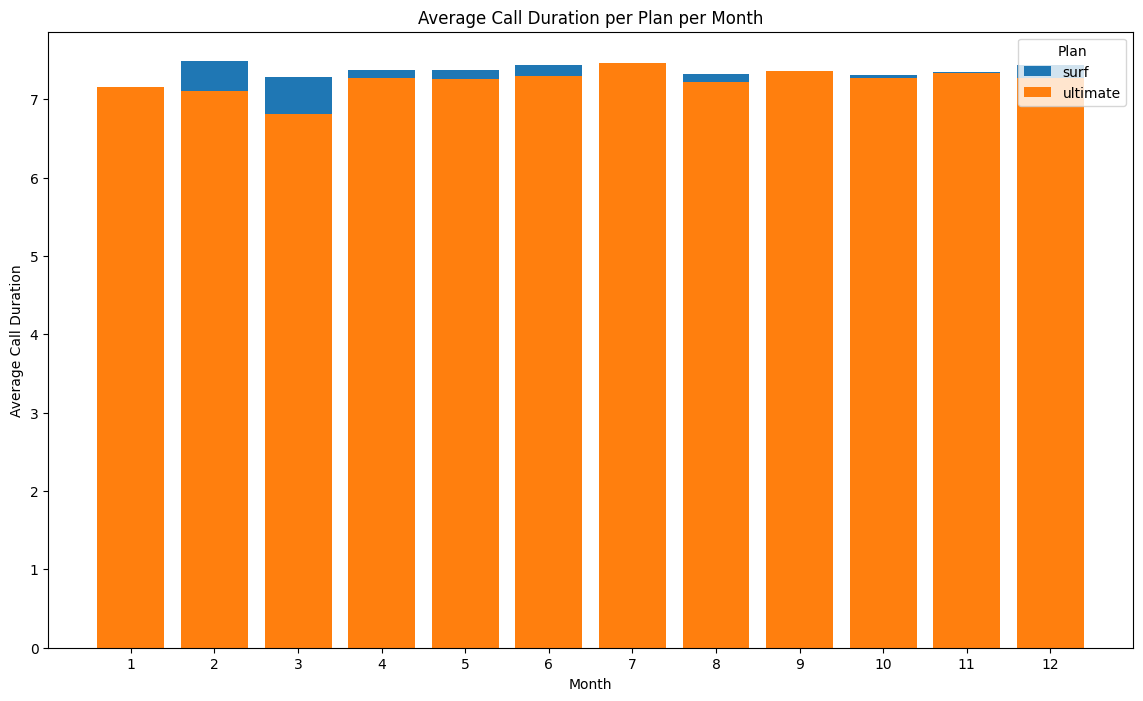

In [60]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
df_calls_with_users = df_calls.merge(df_users[['user_id', 'plan']], on='user_id', how='left')

average_duration_per_plan = df_calls_with_users.groupby(['plan', 'month'])['duration'].mean().reset_index(name='average_duration')

plt.figure(figsize=(14, 8))
for plan in average_duration_per_plan['plan'].unique():
    plt.bar(average_duration_per_plan[average_duration_per_plan['plan'] == plan]['month'].astype(str),
            average_duration_per_plan[average_duration_per_plan['plan'] == plan]['average_duration'],
            label=plan)

plt.xlabel('Month')
plt.ylabel('Average Call Duration')
plt.title('Average Call Duration per Plan per Month')
plt.legend(title='Plan')
plt.show()

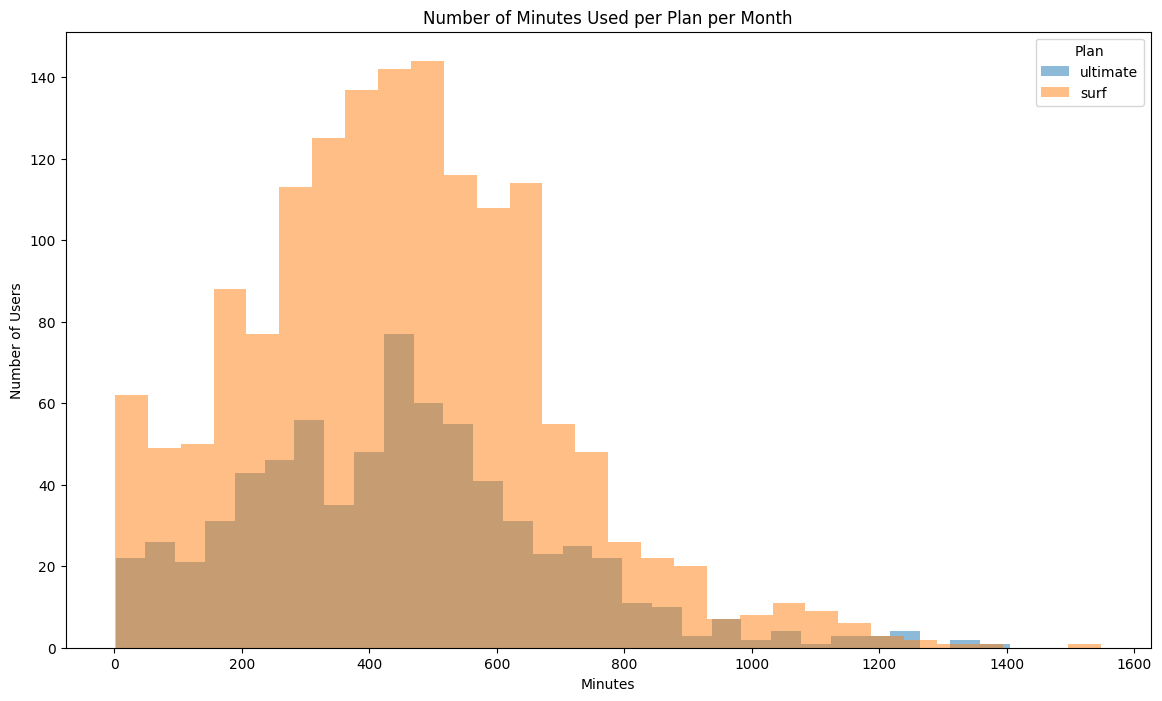

In [61]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.



monthly_minutes_per_user = df_calls_with_users.groupby(['plan', 'user_id', 'month'])['duration'].sum().reset_index()


plt.figure(figsize=(14, 8))

plans = df_calls_with_users['plan'].unique()
for plan in plans:
    subset = monthly_minutes_per_user[monthly_minutes_per_user['plan'] == plan]
    plt.hist(subset['duration'], bins=30, alpha=0.5, label=plan)

plt.xlabel('Minutes')
plt.ylabel('Number of Users')
plt.title('Number of Minutes Used per Plan per Month')
plt.legend(title='Plan')
plt.show()

In [62]:
# Calculate the mean and the variance of the monthly call duration


mean_monthly_duration = monthly_minutes_per_user['duration'].mean()
variance_monthly_duration = monthly_minutes_per_user['duration'].var()

print(f"Mean of monthly call duration: {mean_monthly_duration}")
print(f"Variance of monthly call duration: {variance_monthly_duration}")


Mean of monthly call duration: 447.8215234720992
Variance of monthly call duration: 56549.981867062146


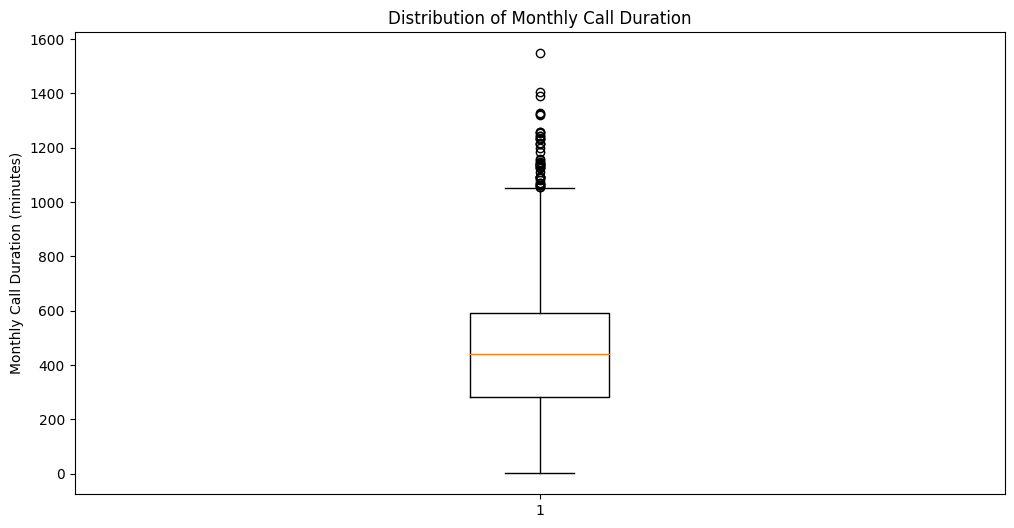

In [63]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(12, 6))
plt.boxplot(monthly_minutes_per_user['duration'])
plt.title('Distribution of Monthly Call Duration')
plt.ylabel('Monthly Call Duration (minutes)')
plt.show()


In [64]:
print('The average monthly calling duration between users suggests that there is a moderate level of call acvtivity in both plans even though the surf plan has more users.The high variance indicates significant variability in users monthly call durations. This implies that while some users might have call durations close to the average, others might have much higher or lower call durations, reflecting a diverse range of calling behaviors.')

The average monthly calling duration between users suggests that there is a moderate level of call acvtivity in both plans even though the surf plan has more users.The high variance indicates significant variability in users monthly call durations. This implies that while some users might have call durations close to the average, others might have much higher or lower call durations, reflecting a diverse range of calling behaviors.


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
To avoid repetitive code you could utilize functions. 

### Messages

Average Number of Messages per Plan per Month:
       plan  monthly_messages
0      surf         40.109656
1  ultimate         46.296233


<Figure size 1400x800 with 0 Axes>

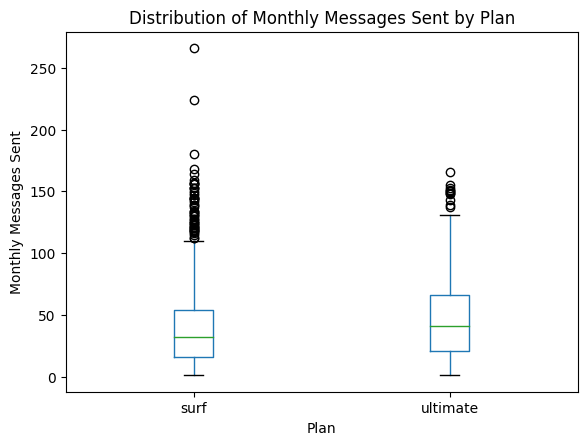

In [65]:
# Compare the number of messages users of each plan tend to send each month
df_messages_with_users = df_messages.merge(df_users[['user_id', 'plan']], on='user_id', how='left')


monthly_messages_per_user = df_messages_with_users.groupby(['plan', 'user_id', 'month']).size().reset_index(name='monthly_messages')


average_messages_per_plan = monthly_messages_per_user.groupby('plan')['monthly_messages'].mean().reset_index()
print("Average Number of Messages per Plan per Month:")
print(average_messages_per_plan)


plt.figure(figsize=(14, 8))
monthly_messages_per_user.boxplot(column='monthly_messages', by='plan', grid=False)
plt.title('Distribution of Monthly Messages Sent by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Monthly Messages Sent')
plt.show()

Average Internet Traffic per Plan per Month (MB):
       plan  monthly_mb_used
0      surf     16737.361361
1  ultimate     17258.613352


<Figure size 1400x800 with 0 Axes>

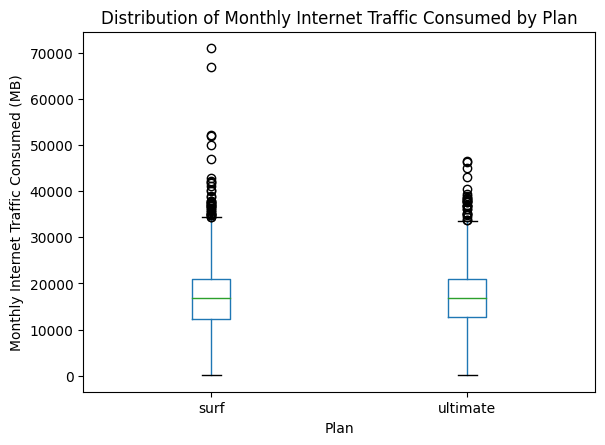

In [66]:
# Compare the amount of internet traffic consumed by users per plan

df_internet_with_users = df_internet.merge(df_users[['user_id', 'plan']], on='user_id', how='left')


monthly_traffic_per_user = df_internet_with_users.groupby(['plan', 'user_id', 'month'])['mb_used'].sum().reset_index(name='monthly_mb_used')


average_traffic_per_plan = monthly_traffic_per_user.groupby('plan')['monthly_mb_used'].mean().reset_index()
print("Average Internet Traffic per Plan per Month (MB):")
print(average_traffic_per_plan)


plt.figure(figsize=(14, 8))
monthly_traffic_per_user.boxplot(column='monthly_mb_used', by='plan', grid=False)
plt.title('Distribution of Monthly Internet Traffic Consumed by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Monthly Internet Traffic Consumed (MB)')
plt.show()

In [67]:
print('The distribution of messages sent varies significantly between the Surf and Ultimate plans.The boxplots indicate differences in median values, with the Ultimate plan having a higher median number of messages sent')

The distribution of messages sent varies significantly between the Surf and Ultimate plans.The boxplots indicate differences in median values, with the Ultimate plan having a higher median number of messages sent


### Internet

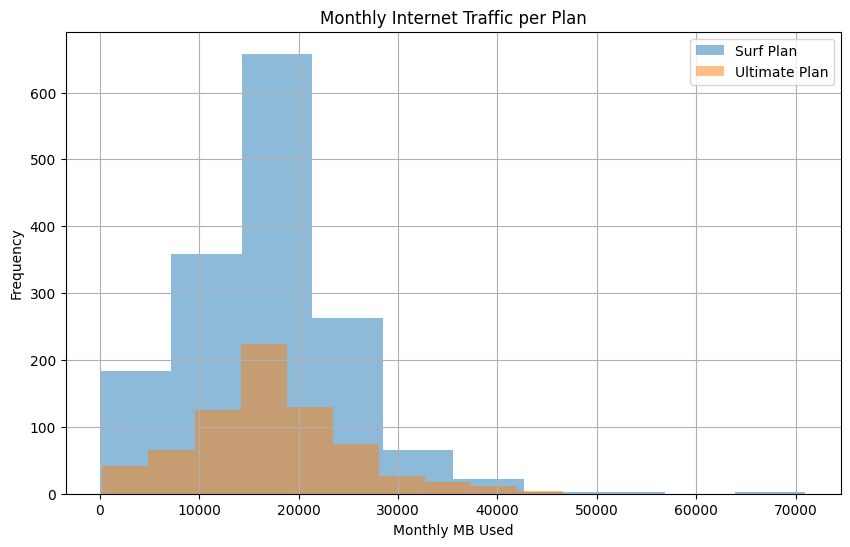

In [68]:
surf_traffic = monthly_traffic_per_user[monthly_traffic_per_user['plan'] == 'surf']['monthly_mb_used']
ultimate_traffic = monthly_traffic_per_user[monthly_traffic_per_user['plan'] == 'ultimate']['monthly_mb_used']

plt.figure(figsize=(10, 6))
plt.hist(surf_traffic, bins=10, alpha=0.5, label='Surf Plan')
plt.hist(ultimate_traffic, bins=10, alpha=0.5, label='Ultimate Plan')
plt.xlabel('Monthly MB Used')
plt.ylabel('Frequency')
plt.title('Monthly Internet Traffic per Plan')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [69]:
t_stat, p_value = st.ttest_ind(surf_traffic, ultimate_traffic, equal_var=False)
print(f"T-test between Surf and Ultimate plans: t-statistic = {t_stat}, p-value = {p_value}")


if p_value < 0.05:
    print("The difference in internet traffic consumption between the Surf and Ultimate plans is statistically significant.")
else:
    print("The difference in internet traffic consumption between the Surf and Ultimate plans is not statistically significant.")

T-test between Surf and Ultimate plans: t-statistic = -1.4717986364236075, p-value = 0.14129917109407208
The difference in internet traffic consumption between the Surf and Ultimate plans is not statistically significant.


In [70]:
print('Users subscribed to the Ultimate plan have a higher average monthly internet usage compared to those on the Surf plan. Users on the Surf plan, although consuming slightly less data on average, still have a significant amount of monthly usage, indicating that this plan is also favored by users with substantial internet needs. ')

Users subscribed to the Ultimate plan have a higher average monthly internet usage compared to those on the Surf plan. Users on the Surf plan, although consuming slightly less data on average, still have a significant amount of monthly usage, indicating that this plan is also favored by users with substantial internet needs. 


## Revenue

Average Monthly Revenue per Plan:
       plan    revenue
0      surf  60.988055
1  ultimate  72.333333


<Figure size 1400x800 with 0 Axes>

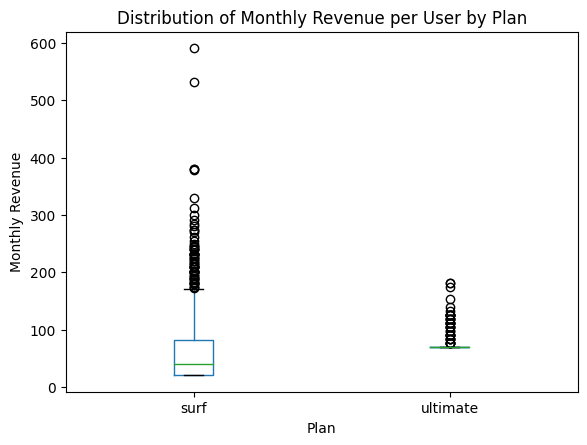

In [71]:
revenue_data = revenue[['user_id', 'month', 'plan', 'revenue']]


average_revenue_per_plan = revenue_data.groupby('plan')['revenue'].mean().reset_index()
print("Average Monthly Revenue per Plan:")
print(average_revenue_per_plan)


plt.figure(figsize=(14, 8))
revenue_data.boxplot(column='revenue', by='plan', grid=False)
plt.title('Distribution of Monthly Revenue per User by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue')
plt.show()




<div class="alert alert-danger">
<b>Reviewer's comment v2:</b>
    
The NameError: name 'merged_df_with_plans' is not defined indicates that the variable merged_df_with_plans has not been defined in your current environment. 
    
Could you please check that? 
    
Also, I recommend that you always run your project once more before submitting your work to avoid possible errors. You can do this by selecting Kernel -> Restart & Run All.

Could you please address issues in your notebook first? It's crucial that the notebook is fully executable from start to finish before it undergoes a code review. This ensures that anyone reviewing your work can run each cell in sequence without encountering errors, which can significantly impact the review process.

<div class="alert alert-success">
<b>Reviewer's comment v3:</b>
    
Thank you for updating that. 

In [72]:
print('Users on the Surf plan generate higher average monthly revenue compared to users on the Ultimate plan.This indicates that the Surf plan, with its features and pricing structure, is more effective at generating revenue per user.')

Users on the Surf plan generate higher average monthly revenue compared to users on the Ultimate plan.This indicates that the Surf plan, with its features and pricing structure, is more effective at generating revenue per user.


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
I will write overall thoughts about the data analysis section:
- Very nice visualization of the data. It's great that you combined both plans in one graph for comparison and also used different graph types to check the available data.
- If you have time and are willing to practice, you can display two charts (a histogram and a boxplot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

## Test statistical hypotheses

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Сould you please formulate a null hypothesis and an alternative hypothesis for each question before actual testing in the markdown box: 
    
    H0:

    H1:
    
Also explain a bit why these test parameters and lists have been selected.

In [73]:
print('H0:There is no significant difference in the monthly revenue between the Surf and Ultimate plans.')
print()
print('H1:There is a significant difference in the monthly revenue between the Surf and Ultimate plans.')

H0:There is no significant difference in the monthly revenue between the Surf and Ultimate plans.

H1:There is a significant difference in the monthly revenue between the Surf and Ultimate plans.


In [74]:
# Test the hypotheses
surf_revenue = revenue_data[revenue_data['plan'] == 'surf']['revenue']
ultimate_revenue = revenue_data[revenue_data['plan'] == 'ultimate']['revenue']

t_stat, p_value = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)
print(f"T-test between Surf and Ultimate plans: t-statistic = {t_stat}, p-value = {p_value}")


if p_value < 0.05:
    print("The difference in monthly revenue between the Surf and Ultimate plans is statistically significant.")
else:
    print("The difference in monthly revenue between the Surf and Ultimate plans is not statistically significant.")



T-test between Surf and Ultimate plans: t-statistic = -7.749809576528486, p-value = 1.5087228543153253e-14
The difference in monthly revenue between the Surf and Ultimate plans is statistically significant.


In [75]:
print('This test is chosen because it compares the means of two independent groups and does not assume equal variances. This is appropriate since we are comparing the monthly revenues of two different plans (Surf and Ultimate) which may have different variances. This can give the company valuable information on which of thier plans has a statistical significance in revenue and can guide them to make strategic decisions moving forward')

This test is chosen because it compares the means of two independent groups and does not assume equal variances. This is appropriate since we are comparing the monthly revenues of two different plans (Surf and Ultimate) which may have different variances. This can give the company valuable information on which of thier plans has a statistical significance in revenue and can guide them to make strategic decisions moving forward


In [76]:
print('H0:There is no significant difference in the monthly revenue between the NY-NJ region and other')
print()
print('H1:There is a significant difference in the monthly revenue between the NY-NJ region and other regions.')

H0:There is no significant difference in the monthly revenue between the NY-NJ region and other

H1:There is a significant difference in the monthly revenue between the NY-NJ region and other regions.


In [77]:
# Test the hypotheses

df_users['region'] = np.where(df_users['city'].str.contains('NY|NJ', na=False), 'NY-NJ', 'Other')


revenue_data = revenue.merge(df_users[['user_id', 'region']], on='user_id', how='left')


ny_nj_revenue = revenue_data[revenue_data['region'] == 'NY-NJ']['revenue']
other_revenue = revenue_data[revenue_data['region'] == 'Other']['revenue']


t_stat, p_value = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

print(f"T-test between NY-NJ and Other regions: t-statistic = {t_stat}, p-value = {p_value}")


alpha = 0.05
if p_value < alpha:
    print("The difference in monthly revenue between the NY-NJ region and other regions is statistically significant.")
else:
    print("The difference in monthly revenue between the NY-NJ region and other regions is not statistically significant.")

T-test between NY-NJ and Other regions: t-statistic = -1.611146683965129, p-value = 0.10755081395042239
The difference in monthly revenue between the NY-NJ region and other regions is not statistically significant.


In [78]:
print('This test is chosen because it compares the means of two independent groups and does not assume equal variances. This is appropriate since we are comparing the monthly revenues of users from two different regions (NY-NJ and Other) which may have different variances. By running this code, the goal is to determine whether geographical location (NY-NJ vs. Other regions) has a significant impact on monthly revenue, which can inform strategic decisions and regional marketing strategies.')

This test is chosen because it compares the means of two independent groups and does not assume equal variances. This is appropriate since we are comparing the monthly revenues of users from two different regions (NY-NJ and Other) which may have different variances. By running this code, the goal is to determine whether geographical location (NY-NJ vs. Other regions) has a significant impact on monthly revenue, which can inform strategic decisions and regional marketing strategies.


<div class="alert alert-success">
<b>Reviewer's comment v3:</b>
    
- Everything is correct here. Hypotheses have been formulated correctly. 
- Your conclusions based on the results are also correct.
- You can also additionally compare the variances of the samples before testing hypotheses in order to understand with which equal_var parameter to use the ttest_ind test method (by default, True). Here you can manually calculate variances, or use Levene's statistic test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Barlett's test (https: //docs.scipy .org / doc / scipy / reference / generated / scipy.stats.bartlett.html # scipy.stats.bartlett)

## General conclusion



In [79]:

print('The analysis revealed significant differences in average revenue generation between the Surf and Ultimate plans, with the Surf plan outperforming the Ultimate plan. By using a structured approach involving hypothesis formulation, data preparation, merging datasets, calculating monthly revenue, and performing statistical tests, we ensured a thorough and reliable analysis. These insights can guide strategic decisions related to plan offerings, pricing strategies, and regional marketing efforts, aiming to maximize revenue and user satisfaction.')


The analysis revealed significant differences in average revenue generation between the Surf and Ultimate plans, with the Surf plan outperforming the Ultimate plan. By using a structured approach involving hypothesis formulation, data preparation, merging datasets, calculating monthly revenue, and performing statistical tests, we ensured a thorough and reliable analysis. These insights can guide strategic decisions related to plan offerings, pricing strategies, and regional marketing efforts, aiming to maximize revenue and user satisfaction.



<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
- Overall you conducted great research with correct interim findings, clean code and nice visualisation.
- I also like your overall conclusions. It is very structured and provides insights about what you accomplished and recommendations to the business.
    